Man

In [1]:
import matplotlib.pyplot as plt
import SimpleITK

In [2]:
SimpleITK.__version__

'2.3.1'

In [3]:
#read image inside SimpleITK format
img = SimpleITK.ReadImage("./data/man.png", SimpleITK.sitkInt8)
img = SimpleITK.Cast(img, SimpleITK.sitkFloat64)

In [4]:
type(img)

SimpleITK.SimpleITK.Image

In [5]:
edge1 = SimpleITK.CannyEdgeDetection(img, lowerThreshold=10, upperThreshold=15, variance= [1, 1])

In [6]:
#convert to numpy array for imshow
edge1 = SimpleITK.GetArrayFromImage(edge1)

In [7]:
type(edge1)

numpy.ndarray

In [9]:
edge1.shape

(256, 256)

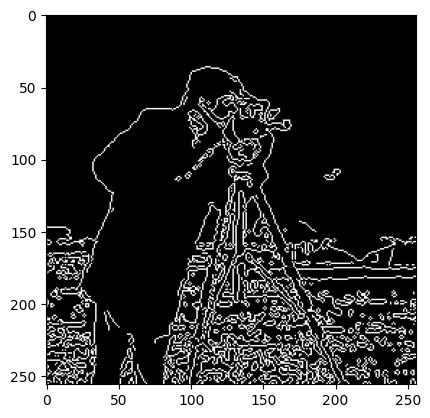

In [10]:
plt.imshow(edge1, cmap="grey")

In [14]:
edge2 = SimpleITK.CannyEdgeDetection(img, lowerThreshold=5, upperThreshold=10, variance= [1, 1])

In [15]:
edge2 = SimpleITK.GetArrayFromImage(edge2)

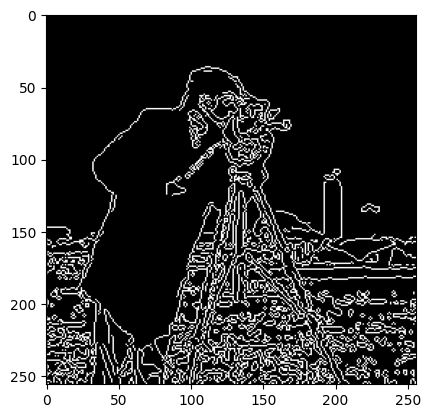

In [16]:
plt.imshow(edge2, cmap="grey")

In [17]:
edge3 = SimpleITK.CannyEdgeDetection(img, lowerThreshold=30, upperThreshold=40, variance= [1, 1])

In [18]:
edge3 = SimpleITK.GetArrayFromImage(edge3)

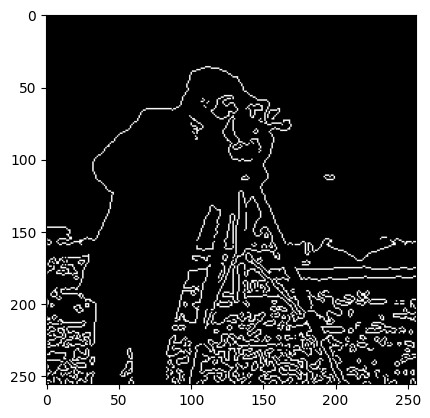

In [20]:
plt.imshow(edge3, cmap="grey")

In [ ]:
# apply SimpleITK the same to roman.png

Circle & Zebra

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rec = cv2.imread("./data/recording.jpg")

In [3]:
rec = cv2.cvtColor(rec, cv2.COLOR_BGR2GRAY)

In [4]:
type(rec)

numpy.ndarray

In [5]:
rec.shape

(851, 1280)

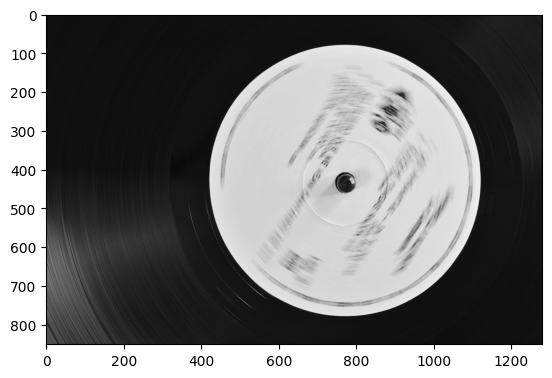

In [6]:
plt.imshow(rec, cmap="gray")

In [7]:
thresh = 150
maxvalue = 255
th, dst = cv2.threshold(rec,thresh,maxvalue,cv2.THRESH_BINARY)

In [8]:
type(th), type(dst)

(float, numpy.ndarray)

In [9]:
th, dst

(150.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [10]:
dst.max(),dst.min()

(255, 0)

In [11]:
dst

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
dst.shape

(851, 1280)

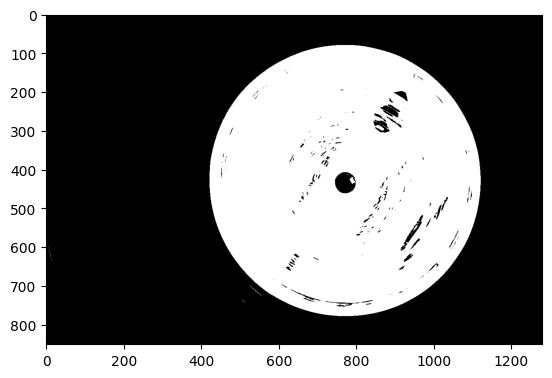

In [13]:
plt.imshow(dst, cmap="gray")

In [14]:
dst.std() #121 --> white

121.2348837541165

In [15]:
zebra = cv2.imread("./data/zebra.jpg")

In [17]:
zebra = cv2.cvtColor(zebra, cv2.COLOR_BGR2GRAY)

In [18]:
zebra.shape

(853, 1280)

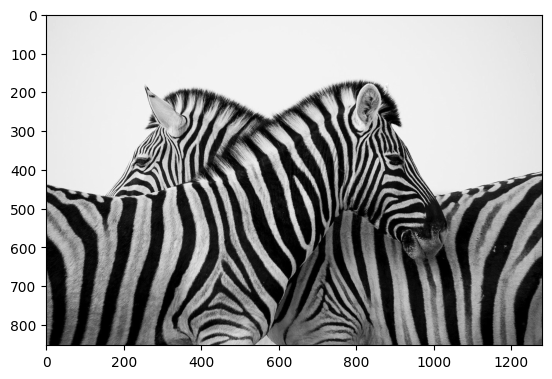

In [20]:
plt.imshow(zebra, cmap="gray")

In [21]:
dst.shape, zebra.shape

((851, 1280), (853, 1280))

In [22]:
dst = cv2.resize(dst, (1280, 800), interpolation=cv2.INTER_LINEAR)
zebra = cv2.resize(zebra, (1280, 800), interpolation=cv2.INTER_LINEAR)

In [26]:
dst.shape, zebra.shape

((800, 1280), (800, 1280))

In [24]:
type(dst), type(zebra)

(numpy.ndarray, numpy.ndarray)

In [27]:
full = np.where(dst, zebra, 0)

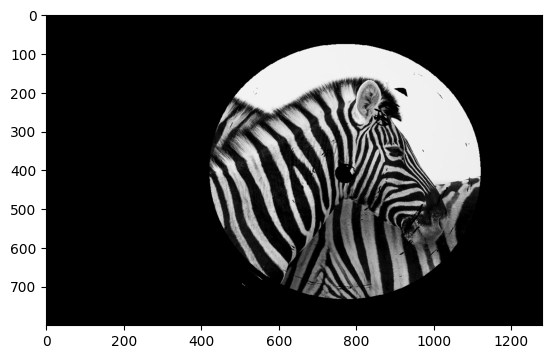

In [28]:
plt.imshow(full, cmap="gray")

In [32]:
full.std()

80.48994027188228

Water Drip

In [47]:
water = cv2.imread("./data/water_drip.jpg")

In [48]:
water.shape

(849, 1280, 3)

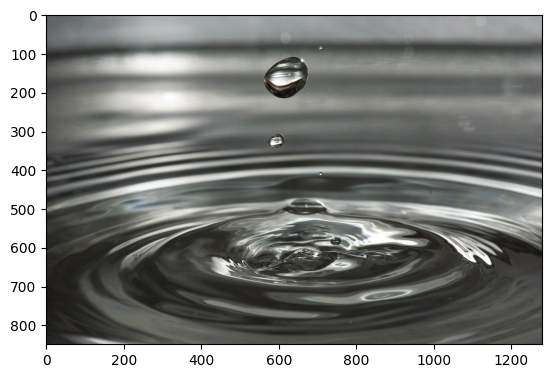

In [49]:
plt.imshow(water[:,:,::-1])

In [50]:
water = cv2.cvtColor(water, cv2.COLOR_BGR2GRAY)

In [51]:
water.shape

(849, 1280)

In [53]:
height, width = water.shape

In [54]:
height 

849

In [55]:
width

1280

In [66]:
tx = 150
ty = 150

Image Translation 

In [67]:
#Translation Array
M = np.float32([[1,0,tx],[0,1,ty]])
new = cv2.warpAffine(water, M, (width, height))

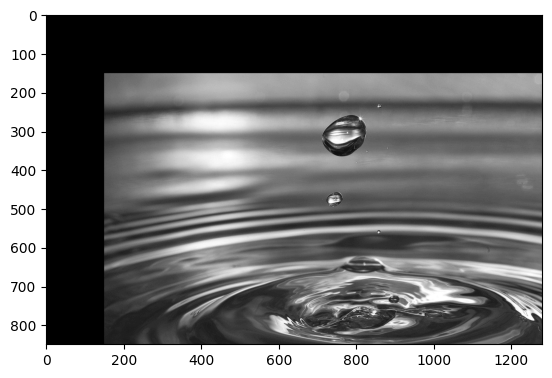

In [68]:
plt.imshow(new, cmap="gray")

Image Rotation

In [105]:
angle = 45
center = (width//2 , height//2)
scale = 2

M = cv2.getRotationMatrix2D(center, angle, scale)
new2 = cv2.warpAffine(water, M, (width, height))

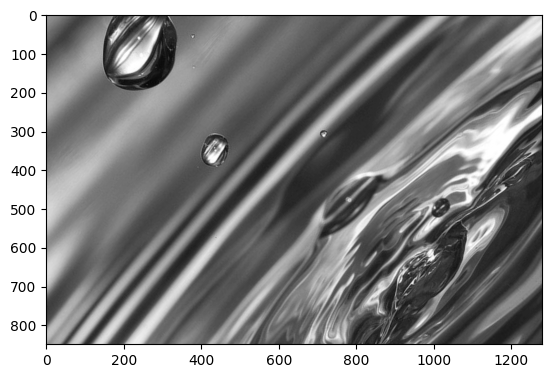

In [106]:
plt.imshow(new2, cmap="gray")

In [107]:
water.shape, new.shape, new2.shape

((849, 1280), (849, 1280), (849, 1280))

Resize

In [108]:
water.shape

(849, 1280)

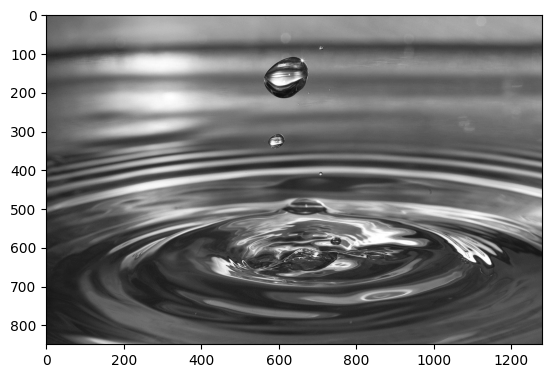

In [111]:
plt.imshow(water, cmap="gray")

In [134]:
resized_img = cv2.resize(water, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

In [135]:
resized_img.shape

(1698, 2560)

In [136]:
(849*2, 1280*2)

(1698, 2560)

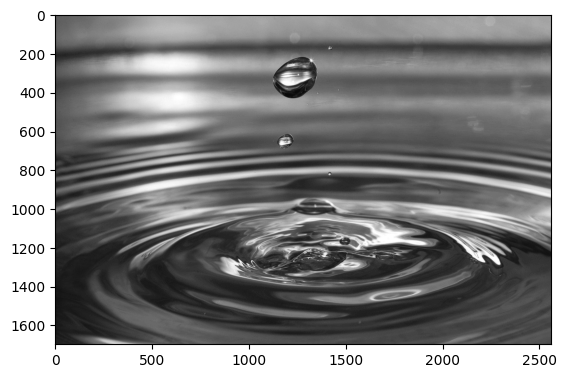

In [137]:
plt.imshow(resized_img, cmap="gray")

Book -> select (crop)

In [138]:
book = cv2.imread("./data/book.jpg")

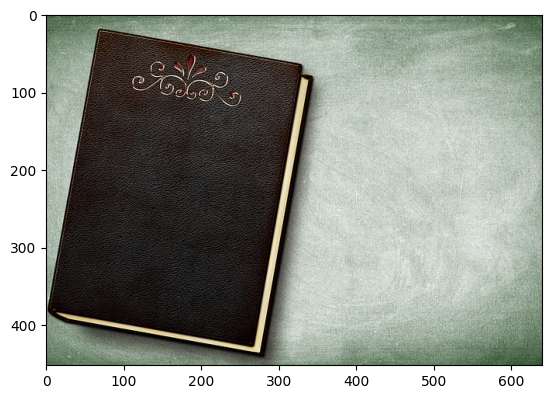

In [140]:
plt.imshow(book[:,:,::-1])